In [ ]:
import os
import time
import uuid
import cv2
import pandas as pd
import numpy as np

In [ ]:
import pickle
import numpy
import tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau , EarlyStopping
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set(style='white', context='notebook', palette='deep')

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
sarah='/content/gdrive/MyDrive/NTI/Automated Video Surveillance/face_verification/datasetV2/sarah'
yasmeen='/content/gdrive/MyDrive/NTI/Automated Video Surveillance/face_verification/datasetV2/yasmeen'
negative='/content/gdrive/MyDrive/NTI/Automated Video Surveillance/face_verification/datasetV2/negative'

In [ ]:
yy = []
paths = os.listdir(yasmeen)
for path in paths:
    yy.append(yasmeen+'/'+path)

In [ ]:
ss = []
paths = os.listdir(sarah)
for path in paths:
    ss.append(sarah+'/'+path)

In [ ]:
yy

In [ ]:
neg= '/content/gdrive/MyDrive/NTI/Automated Video Surveillance/face_verification/datasetV2/negative'
nn = []
paths = os.listdir(negative)
for path in paths:
  print(negative+'/'+path)
  nn.append(negative+'/'+path)

In [ ]:
import random

random.shuffle(yy)
random.shuffle(ss)
random.shuffle(nn)

In [ ]:
import random
random.shuffle(nn)

In [ ]:
len(nn)

1000

In [ ]:
732/3

244.0

In [ ]:
882/3

294.0

In [ ]:
244+294

538

In [ ]:
s_pos = ss[244:487]
y_pos = yy[294:587]

s_anc = ss[0:243]
y_anc = yy[0:293:]

s_anc2 = ss[488:731]
y_anc2 =yy[588:881]

s_neg =nn[0:243]
y_neg =nn[255:548] 

In [ ]:
294+294+294

882

In [ ]:
255+294

549

In [ ]:
len(s_anc) + len(y_anc) + len(s_anc2) + len(y_anc2)

1072

In [ ]:
anchor = s_anc +y_anc +s_anc2 +y_anc2

In [ ]:
len(s_anc)

243

In [ ]:
len(y_anc)

293

In [ ]:
len(s_anc2)

243

In [ ]:
len(y_anc2)

293

In [ ]:
len(s_pos) + len(y_pos) + len(s_neg) + len(y_neg)

1072

In [ ]:
validation = s_pos + y_pos + s_neg + y_neg

In [ ]:
len(s_pos)

243

In [ ]:
len(y_pos)

293

In [ ]:
len(s_neg)

243

In [ ]:
len(y_neg)

293

In [ ]:
# Define column names
columns = ['anchor', 'validation', 'lable']

# Initialize DataFrame with zeroes
df = pd.DataFrame(0, index=range(1072), columns=columns)

In [ ]:
df

,anchor,validation,lable
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1067,0,0,0
1068,0,0,0
1069,0,0,0
1070,0,0,0


In [ ]:
df['anchor'] = anchor

In [ ]:
df['validation'] =validation

In [ ]:
243+487

730

In [ ]:
782+294

1076

In [ ]:
243+243+293

779

In [ ]:
243+243+293+293

1072

In [ ]:
df['lable'].value_counts()

0    536
2    293
1    243
Name: lable, dtype: int64

In [ ]:
df.to_csv('/content/gdrive/MyDrive/Automated Video Surveillance/face_verification/datasetV2/datasetv2.csv', index=False)

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Automated Video Surveillance/face_verification/datasetV2/datasetv2.csv')

In [ ]:
#lable = "1" *243 +"0" *243 +"2"*293 + "0" *293
df.loc[0:242, 'lable'] = 1
df.loc[243:535, 'lable'] = 2
df.loc[536:1071, 'lable'] = 0


In [ ]:
df

,anchor,validation,lable
0,/content/gdrive/MyDrive/NTI/Automated Video Su...,/content/gdrive/MyDrive/NTI/Automated Video Su...,1
1,/content/gdrive/MyDrive/NTI/Automated Video Su...,/content/gdrive/MyDrive/NTI/Automated Video Su...,1
2,/content/gdrive/MyDrive/NTI/Automated Video Su...,/content/gdrive/MyDrive/NTI/Automated Video Su...,1
3,/content/gdrive/MyDrive/NTI/Automated Video Su...,/content/gdrive/MyDrive/NTI/Automated Video Su...,1
4,/content/gdrive/MyDrive/NTI/Automated Video Su...,/content/gdrive/MyDrive/NTI/Automated Video Su...,1
...,...,...,...
1067,/content/gdrive/MyDrive/NTI/Automated Video Su...,/content/gdrive/MyDrive/NTI/Automated Video Su...,0
1068,/content/gdrive/MyDrive/NTI/Automated Video Su...,/content/gdrive/MyDrive/NTI/Automated Video Su...,0
1069,/content/gdrive/MyDrive/NTI/Automated Video Su...,/content/gdrive/MyDrive/NTI/Automated Video Su...,0
1070,/content/gdrive/MyDrive/NTI/Automated Video Su...,/content/gdrive/MyDrive/NTI/Automated Video Su...,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size = 0.3, random_state=42)

In [ ]:
!pip install deepface

In [ ]:
#from deepface.basemodels import Facenet,VGGFace
from tensorflow.keras.models import Model ,load_model

import tensorflow as tf
from keras.applications import VGG16
from keras.layers import Lambda

from deepface.basemodels import Facenet,VGGFace
from tensorflow.keras.models import Model ,load_model

import tensorflow as tf


def make_siamese_model():

    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(224,224,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(224,224,3))

    vgg = VGGFace.baseModel()
    vgg.load_weights('/content/gdrive/MyDrive/Automated Video Surveillance/face_verification/vgg_face_weights.h5')
    cnt = 0
    for lyer in vgg.layers:
        if cnt>34:
            lyer.trainable= True
            #lyer.activation = tf.keras.activations.tanh
            lyer.activation= tf.keras.layers.Activation('tanh')
        else:
            lyer.trainable =False
        cnt = cnt+1
    vgg_face = Model(inputs=vgg.layers[0].input, outputs=vgg.layers[-2].output)
    x1 = vgg_face(input_image)
    x2 = vgg_face(validation_image)

    
    # Flatten the embeddings
    x1 = Flatten()(x1)
    x2 = Flatten()(x2)
    
    # Calculate the L1 distance
    distances = Lambda(lambda x: tf.math.abs(x[0] - x[1]), name='L1_distance')([x1, x2])
    
    # Classification layer
    classifier =Dense(3, activation='softmax')(distances)
    
    # Create the Siamese model
    siamese_model = Model(inputs=[input_image, validation_image], outputs=classifier)
    
    return siamese_model

In [ ]:
our_model = make_siamese_model()
our_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_2 (Functional)           (None, 2622)         145002878   ['input_img[0][0]',              
                                                                  'validation_img[0][0]']   

In [ ]:
def train_model(model,train_data,val_data,Nclasses, SHAPE , dataGenerator , EPOCHS , BATCH_SIZE,best_model):

  # call generator 
  # train and val generaator
  train_siamese_generator = dataGenerator(data = train_data,n_classes=Nclasses,batch_size=BATCH_SIZE,shape=SHAPE) 
  val_siamese_generator = dataGenerator(data =val_data,n_classes=Nclasses,batch_size=BATCH_SIZE,shape=SHAPE) 
  #def __init__(self, data, n_classes, batch_size=32, shape=(100, 100, 3), shuffle=True):

  # compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  # define callbacks lists
  model_checkpoint_callback = ModelCheckpoint(
      filepath=best_model,
      monitor='loss', 
      verbose=0, 
      save_best_only=True, 
      mode='min')
  learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', 
                                              patience=3, 
                                              verbose=1, 
                                              factor=0.5, 
                                              min_lr=0.00001)
  es = EarlyStopping(monitor="loss", mode="min", verbose=1, patience=7)
  callbacks_list = [model_checkpoint_callback, learning_rate_reduction,es]

  # fit the model
  history = model.fit_generator(generator=train_siamese_generator,
                      validation_data=val_siamese_generator,
                      epochs=EPOCHS,callbacks=callbacks_list, verbose=2)
  return history

In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/Automated Video Surveillance/face_verification')

In [ ]:
# import our Generator
from Siamese_Generator import SiameseGenerator

In [ ]:
#history = train_model(model=our_model, train_data=X_train, val_data=X_val, Nclasses=3, SHAPE=(100,100,3), dataGenerator=SiameseGenerator, EPOCHS=100, BATCH_SIZE=32, best_model='/content/gdrive/MyDrive/NTI/Automated Video Surveillance/face_verification/best.h5')
history = train_model(model=our_model, train_data=X_train, val_data=X_test, Nclasses=3, SHAPE=(224,224,3), dataGenerator=SiameseGenerator, EPOCHS=20, BATCH_SIZE=64, best_model='/content/gdrive/MyDrive/Automated Video Surveillance/face_verification/datasetV2/best_vgg_data_new_correct.h5')

Epoch 1/20
11/11 - 58s - loss: 0.8002 - accuracy: 0.5497 - val_loss: 0.5905 - val_accuracy: 0.6281 - lr: 0.0010 - 58s/epoch - 5s/step
Epoch 2/20
11/11 - 56s - loss: 0.4682 - accuracy: 0.7273 - val_loss: 0.3868 - val_accuracy: 0.8813 - lr: 0.0010 - 56s/epoch - 5s/step
Epoch 3/20
11/11 - 53s - loss: 0.2862 - accuracy: 0.9176 - val_loss: 0.2819 - val_accuracy: 0.9250 - lr: 0.0010 - 53s/epoch - 5s/step
Epoch 4/20
11/11 - 55s - loss: 0.2090 - accuracy: 0.9517 - val_loss: 0.2205 - val_accuracy: 0.9375 - lr: 0.0010 - 55s/epoch - 5s/step
Epoch 5/20
11/11 - 54s - loss: 0.1573 - accuracy: 0.9616 - val_loss: 0.1924 - val_accuracy: 0.9469 - lr: 0.0010 - 54s/epoch - 5s/step
Epoch 6/20
11/11 - 53s - loss: 0.1179 - accuracy: 0.9815 - val_loss: 0.1775 - val_accuracy: 0.9406 - lr: 0.0010 - 53s/epoch - 5s/step
Epoch 7/20
11/11 - 55s - loss: 0.1121 - accuracy: 0.9787 - val_loss: 0.1569 - val_accuracy: 0.9594 - lr: 0.0010 - 55s/epoch - 5s/step
Epoch 8/20
11/11 - 53s - loss: 0.0990 - accuracy: 0.9801 - val

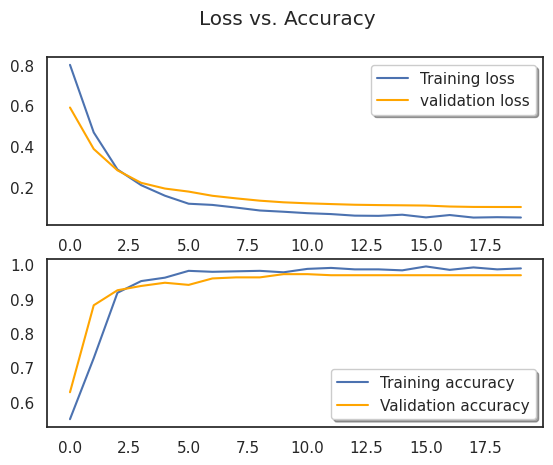

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
fig.suptitle("Loss vs. Accuracy")
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='orange', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='orange',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size = 0.3, random_state=42)

In [ ]:
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def create_pairs(df):
    # Initialize empty lists for pairs and labels
    pairs = []
    pair_labels = []

    # Get the total number of unique labels
    num_classes = len(np.unique(df['lable']))

    # Get the indices of the images for each label
    indices = [np.where(df['lable'] == i)[0] for i in range(num_classes)]

    # Calculate the number of possible pairs for each label
    min_pairs = np.min([len(indices[i]) for i in range(num_classes)]) - 1

    # Create pairs for each label
    for c in range(num_classes):
        for i in range(min_pairs):
            # Get the index of the first image for this label
            idx1 = indices[c][i]

            # Create a positive pair (i.e., two images with the same label)
            idx2 = indices[c][i+1]
            pairs.append([df.iloc[idx1]['anchor'], df.iloc[idx1]['validation']])

            # Create a negative pair (i.e., two images with different labels)
            neg_label = (c + np.random.randint(1, num_classes)) % num_classes
            idx2 = indices[neg_label][i]
            pairs.append([df.iloc[idx1]['anchor'], df.iloc[idx2]['validation']])

            # Update the labels for the positive and negative pairs
            pair_labels.append(1)
            pair_labels.append(0)

    # Convert the pairs and labels to numpy arrays
    pairs = np.array(pairs)
    pair_labels = np.array(pair_labels)

    # Shuffle the pairs and labels
    pairs, pair_labels = shuffle(pairs, pair_labels)

    # Load the images and convert them to numpy arrays
    img_array1 = np.array([img_to_array(load_img(p, target_size=(224, 224))) for p in pairs[:, 0]])
    img_array2 = np.array([img_to_array(load_img(p, target_size=(224, 224))) for p in pairs[:, 1]])

    # Normalize the images
    img_array1 = img_array1 / 255.0
    img_array2 = img_array2 / 255.0

    # Convert the labels to one-hot encoding
    pair_labels = np.eye(2)[pair_labels]

    return [img_array1, img_array2, pair_labels]

In [ ]:
# Split the test data into pairs
test_pairs = create_pairs(X_test)

In [ ]:

# Create a Dataset object from the data
dataset = tf.data.Dataset.from_tensor_slices((X_test['anchor'], X_test['validation'], X_test['lable']))

In [ ]:
test_data = dataset

In [ ]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (224,224))
    # Scale image to be between 0 and 1 
    img = img / 255.0

    # Return image
    return img

In [ ]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [ ]:
# Build dataloader pipeline
test_data = test_data.map(preprocess_twin)
test_data = test_data.cache()
test_data = test_data.shuffle(buffer_size=10000)

In [ ]:
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [ ]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [ ]:
y_hat = our_model.predict([test_input, test_val])

1/1 [==============================] - 0s 37ms/step


In [ ]:
y_hat

array([[1.7463267e-03, 2.4452906e-03, 9.9580836e-01],
       [7.6738877e-05, 9.9988580e-01, 3.7486810e-05],
       [8.2081778e-04, 2.0785406e-03, 9.9710065e-01],
       [9.8400646e-01, 5.7200771e-03, 1.0273515e-02],
       [9.9991131e-01, 7.7915509e-05, 1.0690525e-05],
       [5.6045521e-03, 9.9165392e-01, 2.7414709e-03],
       [6.0811633e-04, 4.9388874e-03, 9.9445301e-01],
       [1.2225854e-03, 1.4197971e-03, 9.9735755e-01],
       [9.9810070e-01, 2.5486274e-04, 1.6444547e-03],
       [1.6242464e-04, 2.4137144e-04, 9.9959618e-01],
       [1.6240887e-02, 1.1323169e-02, 9.7243595e-01],
       [9.9983740e-01, 1.3417295e-05, 1.4912116e-04],
       [2.3189100e-02, 2.8510515e-02, 9.4830036e-01],
       [1.0000000e+00, 2.8709333e-09, 1.1786721e-08],
       [9.7677749e-01, 1.3297278e-02, 9.9251531e-03],
       [3.4437897e-05, 9.9995887e-01, 6.6393918e-06]], dtype=float32)

In [ ]:
highest_index = np.argmax(y_hat, axis=1)

# Print the result
print(highest_index)

[2 1 2 0 0 1 2 2 0 2 2 0 2 0 0 1]


In [ ]:
y_true

array([2, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 2, 0, 0, 1])

In [ ]:
highest_index = np.argmax(y_hat, axis=1)

# Print the result
print(highest_index)

[2 1 0 1 2 2 1 0 0 2 1 2 2 1 0 2]


In [ ]:
y_true

array([2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 1, 0, 2])

In [ ]:
# Define batch size
#batch_size = 16
highest=[]
t = []
# Iterate over the dataset using batches
#iterator = dataset.batch(batch_size).as_numpy_iterator()
#test_input, test_val, y_true = test_data.as_numpy_iterator().next()
test_data = dataset
# Build dataloader pipeline
test_data = test_data.map(preprocess_twin)
test_data = test_data.cache()
test_data = test_data.shuffle(buffer_size=10000)

test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

while True:
    try:
        #batch = iterator.next()
        test_input, test_val, y_true = test_data.as_numpy_iterator().next()
        
        # Process the batch
        y_hat = our_model.predict([test_input, test_val])
        highest_index = np.argmax(y_hat, axis=1)
        highest.append(highest_index)
        t.append(y_true)
        # Print the result
        print(highest_index)
        print(y_true)
        print(' ')

        #print("Processing batch:", batch)
    except StopIteration:
        # End of dataset
        print("End of dataset")
        break

Streaming output truncated to the last 5000 lines.
[0 1 0 2 2 2 2 2 0 0 1 0 1 0 2 0]
 
1/1 [==============================] - 0s 34ms/step
[2 0 1 0 0 1 0 0 2 1 0 2 0 1 0 2]
[2 0 1 0 0 1 0 0 2 1 0 2 0 1 0 2]
 
1/1 [==============================] - 0s 33ms/step
[2 0 0 2 2 0 2 0 2 0 0 0 0 0 1 0]
[2 0 0 2 2 0 2 0 2 0 0 0 0 0 1 0]
 
1/1 [==============================] - 0s 31ms/step
[2 0 2 2 1 0 0 0 2 0 1 0 0 0 0 0]
[2 0 2 2 1 0 0 0 2 0 1 0 0 0 0 0]
 
1/1 [==============================] - 0s 32ms/step
[1 2 1 0 2 1 1 2 2 2 1 2 0 2 0 1]
[1 2 1 0 2 1 1 2 2 2 1 2 0 2 0 1]
 
1/1 [==============================] - 0s 34ms/step
[0 0 0 2 1 1 1 0 0 0 2 0 0 2 2 0]
[0 0 0 2 1 1 1 0 0 0 2 0 0 2 2 0]
 
1/1 [==============================] - 0s 33ms/step
[0 1 0 0 0 1 0 1 0 0 0 0 2 0 0 1]
[0 1 0 0 0 1 0 1 0 0 0 0 2 0 0 1]
 
1/1 [==============================] - 0s 34ms/step
[1 1 0 0 0 2 0 0 0 0 1 0 2 2 0 0]
[1 1 0 0 0 2 0 0 0 0 1 0 2 2 0 0]
 
1/1 [==============================] - 0s 32ms/step
[1 0 0 

In [ ]:
len(highest)

In [ ]:
print(t)

In [ ]:
from sklearn.metrics import recall_score



# Calculate the recall score
recall = recall_score(t, highest)

# Print the recall score
print("Recall:", recall)

In [ ]:
from sklearn.metrics import precision_score

# Calculate the precision score
precision = precision_score(t, highest)

# Print the precision score
print("Precision:", precision)

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(t, highest)

# Print the accuracy score
print("Accuracy:", accuracy)